In [ ]:
# Have you analyze the dataset?

#Is it balance? Time Test is after Train test  (sometimes it doesn't). 
#dataset, train and test, forecaeting, different dates, split into train and valid, need to split based on dates.

#for example, train 1-6 month, valid 7-9 month, because need to predict based on the past for the future.
#after test the model with the validation, if it's good, we can combine train and validation as one dataset
#And build the model again with this larger dataset, it can perform better!!!

#Are they similar? (Analyzing the count by day)
#First we must compare both datasets,  trying to find insights
#Try to make a little analysis of it, I will try to prepare something this days too. And we can discuss it.
#Do you have some preference for communicate btw us?

In [ ]:
#1.

In [1]:
#data like:
#daily historical sales data
#six data file

#items.csv
#item_categories.csv
#shops.csv

#sales_train.csv
#test.csv

#sample_submission.csv


#goal: The task is to forecast the total amount of products sold in every shop for the test set. One period.

#Challenge1: Creating a robust model that can handle the list of shops and products slightly changes every month.




# Description Analysis

In [1]:
import numpy as np
import os
import pandas as pd
import dask.dataframe as dd


path = os.getcwd()
print(path)

df_train = pd.read_csv(os.path.join(path, "sales_train.csv"))
df_items = pd.read_csv(os.path.join(path, "items.csv"), usecols = ["item_id", "item_category_id"])

/Users/mac/Desktop/Kaggle/competitive-data-science-predict-future-sales


In [2]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
df_train.shape

(2935849, 6)

In [4]:
df_items.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


In [5]:
df_items.shape

(22170, 2)

Add category_id to training dataset

In [6]:
df_train = df_train.merge(df_items, how = "left", on = "item_id")

In [7]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,-1.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   date_block_num    int64  
 2   shop_id           int64  
 3   item_id           int64  
 4   item_price        float64
 5   item_cnt_day      float64
 6   item_category_id  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 179.2+ MB


In [9]:
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


In [10]:
#is there any missing data or incorrect format??? Nope, no missing data
df_train.isnull().sum()

date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
item_category_id    0
dtype: int64

Seperate month and year from Date

In [11]:
df_train["Day"] = df_train["date"].apply(lambda x: x.split(".")[0])

In [12]:
df_train["Month"] = df_train["date"].apply(lambda x: x.split(".")[1])
df_train["Year"] = df_train["date"].apply(lambda x: x.split(".")[2])

In [13]:
df_train["Year_Month_Day"] = df_train["Year"].map(str) + '-'\
    + df_train["Month"].map(str) + '-' + df_train["Day"].map(str)

In [14]:
df_train["date"] = pd.to_datetime(df_train["Year_Month_Day"], format='%Y-%M-%d').dt.strftime('%Y-%M-%d')

In [20]:
df_train = df_train.drop('Year_Month_Day', axis = 1)

In [21]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,Day,Month,Year
0,2013-01-02,0,59,22154,999.00,1.0,37,02,01,2013
1,2013-01-03,0,25,2552,899.00,1.0,58,03,01,2013
2,2013-01-05,0,25,2552,899.00,-1.0,58,05,01,2013
3,2013-01-06,0,25,2554,1709.05,1.0,58,06,01,2013
4,2013-01-15,0,25,2555,1099.00,1.0,56,15,01,2013


In [22]:
df_train.shape

(2935849, 10)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   date_block_num    int64  
 2   shop_id           int64  
 3   item_id           int64  
 4   item_price        float64
 5   item_cnt_day      float64
 6   item_category_id  int64  
 7   Day               object 
 8   Month             object 
 9   Year              object 
dtypes: float64(2), int64(4), object(4)
memory usage: 326.4+ MB


In [24]:
#new_df=pd.pivot_table(df, value=['quantity_buy_item_month'], 
#index=['shop_id', 'item_id' , 'item_category_id' ], aggfunc={'a quantity_buy_item_month ': np.sum}) 
#then you merge this new_df by index_value with the train dataset

new_df = pd.pivot_table(df_train, values = ['item_cnt_day'], index = ['shop_id', 'item_category_id', 'item_id'],
                       aggfunc={'item_cnt_day': np.sum})


In [25]:
new_df.head()
#df_train_category_gb = df_train_category.groupby([df_train_category['date'],df_train_category['shop_id']])['item_id'].count()

item_cnt_day
shop_id item_category_id item_id              
0       0                16255             1.0
        1                5740              1.0
        2                5570              1.0
                         5572             21.0
                         5573              2.0

In [26]:
df_train = df_train.merge(new_df, how = 'left', on = ['shop_id', 'item_category_id', 'item_id'])

In [27]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day_x,item_category_id,Day,Month,Year,item_cnt_day_y
0,2013-01-02,0,59,22154,999.00,1.0,37,02,01,2013,1.0
1,2013-01-03,0,25,2552,899.00,1.0,58,03,01,2013,0.0
2,2013-01-05,0,25,2552,899.00,-1.0,58,05,01,2013,0.0
3,2013-01-06,0,25,2554,1709.05,1.0,58,06,01,2013,1.0
4,2013-01-15,0,25,2555,1099.00,1.0,56,15,01,2013,10.0


In [28]:
#df_train_category.groupby([df_train_category['shop_id'], df_train_category['item_id']])['item_id'].count().plot()

In [29]:
df_test = pd.read_csv("test.csv")

In [30]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [31]:
df_test.shape

(214200, 3)

See the item difference between test and train, count number difference
but the difference doesn't mean the unique pair of shop_id and item_id

In [32]:
df_merge = df_test.merge(df_train, how = 'left', on =['shop_id', 'item_id'])

In [33]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327235 entries, 0 to 1327234
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID                1327235 non-null  int64  
 1   shop_id           1327235 non-null  int64  
 2   item_id           1327235 non-null  int64  
 3   date              1224439 non-null  object 
 4   date_block_num    1224439 non-null  float64
 5   item_price        1224439 non-null  float64
 6   item_cnt_day_x    1224439 non-null  float64
 7   item_category_id  1224439 non-null  float64
 8   Day               1224439 non-null  object 
 9   Month             1224439 non-null  object 
 10  Year              1224439 non-null  object 
 11  item_cnt_day_y    1224439 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 131.6+ MB


In [34]:
df_merge.shape[0] - df_merge.dropna().shape[0]

102796

In [35]:
df_merge.shape[0]

1327235

Get valid dataset, using Oct 2015, and new train set

In [36]:
df_valid = df_merge.loc[(df_merge['Year'] == '2015') & (df_merge['Month'] == '10')]

In [37]:
df_valid.shape

(49532, 12)

In [38]:
df_train_new = df_merge.loc[(df_merge['Year'] != '2015') & (df_merge['Month'] != '10')]

In [39]:
df_valid_train = df_valid.merge(df_train_new, how = 'left', on =['shop_id', 'item_id'])

In [40]:
df_valid_train.shape[0] - df_valid_train.dropna().shape[0]

27698

In [41]:
df_valid_test = df_test.merge(df_valid, how = 'left', on =['shop_id', 'item_id'])

In [42]:
df_valid_test.shape[0] - df_valid_test.dropna().shape[0]

185520

unique shop_id between valid vs train

In [43]:
#shop_id and item_id in train
temp_1 = df_train_new.loc[:, 'shop_id'].unique()
#shop_id and item_id in valid
temp_2 = df_valid.loc[:, 'shop_id'].unique()

In [44]:
temp_3 = [np.isin(temp_2, temp_1)]

In [45]:
np.size(temp_3) - np.count_nonzero(temp_3)

0

how many different shops in valid but not in train? ----0

unique shop_id between test vs train+valid

In [46]:
temp_4 = df_train.loc[:, 'shop_id'].unique()
temp_5 = df_test.loc[:, 'shop_id'].unique()

In [47]:
np.sort(temp_4)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [48]:
np.sort(temp_5)

array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
       26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 55, 56, 57, 58, 59])

In [49]:
temp_6 = [np.isin(temp_5, temp_4)]

In [50]:
np.size(temp_6) - np.count_nonzero(temp_6)

0

how many different shops in test but not in train+valid? ----0

unique shop_id between test vs valid

In [51]:
temp_7 = [np.isin(temp_5, temp_2)]

In [52]:
np.size(temp_7) - np.count_nonzero(temp_7)

0

In [72]:
import matplotlib.pyplot as plt

In [59]:
#fig, ax = plt.subplots()
# plt.plot_date(df_train['date'], df_train['item_cnt_day_x'])
# plt.show()

In [58]:
# plt.figure(figsize=(10, 8))
# plt.plot(df_train['date'], df_train['item_cnt_day_x'])
# plt.show()

Daily sum sales by shop, date

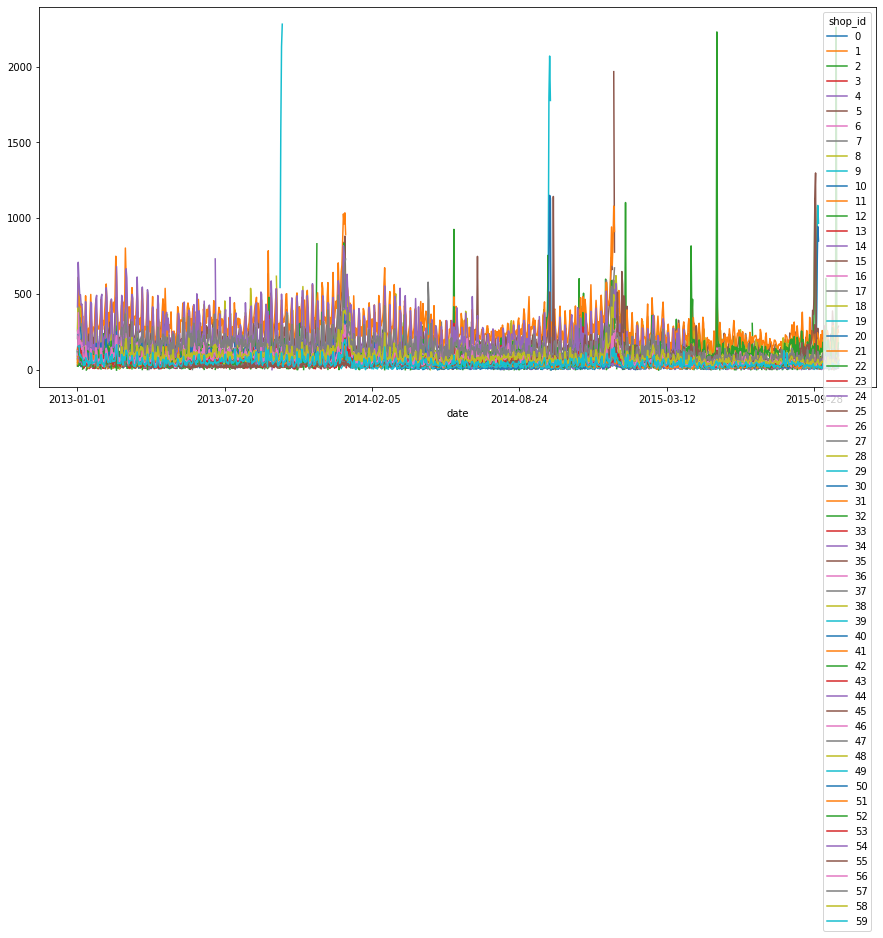

In [60]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_train.groupby(['date','shop_id']).sum()['item_cnt_day_x'].unstack().plot(ax=ax)

Plot daily sale against date

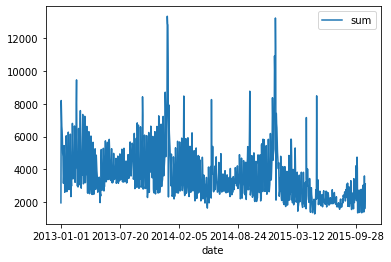

In [73]:
df_daily=df_train.groupby('date').agg(['sum']).reset_index()
df_daily.plot(x='date', y='item_cnt_day_x',kind="line")
plt.show()